# Case study results

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.datasets import make_moons, make_blobs
from sklearn.metrics import adjusted_rand_score, silhouette_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from algorithms import *


warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")

In [2]:
np.random.seed(214)
X_moons, Y_moons = make_moons(n_samples=350, noise=0.1, random_state=214)
X_blobs, Y_blobs = make_blobs(n_samples=80, centers=[[-0.5,-0.5]], cluster_std=0.2, random_state=214)
Y_blobs += 2
X_noise = np.random.uniform(low=-1.5, high=2.0, size=(100,2))

X_vectors = np.vstack([X_moons, X_blobs, X_noise])
Y_vectors = np.concatenate([Y_moons, Y_blobs, -np.ones(100)])

problematic_x = np.vstack([X_moons, X_blobs, X_noise])
problematic_y = np.concatenate([Y_moons, Y_blobs, -np.ones(100)])

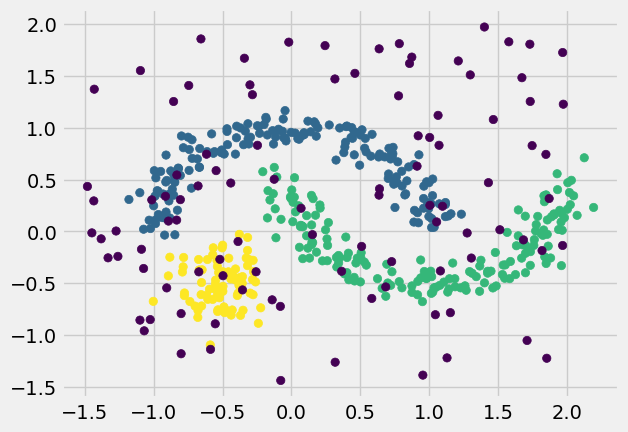

In [3]:
plt.scatter(problematic_x[:, 0], problematic_x[:, 1], c=problematic_y)
plt.show()

In [4]:
non_problematic_x, non_problematic_y = make_blobs(
                                        n_samples=400, 
                                        centers=[(-0.5, -0.6), (1.0, -0.1), (-0.4, 0.9), (0.9, 1.1)],
                                        cluster_std=[0.37, 0.3, 0.23, 0.17],
                                        random_state=43
                                    )

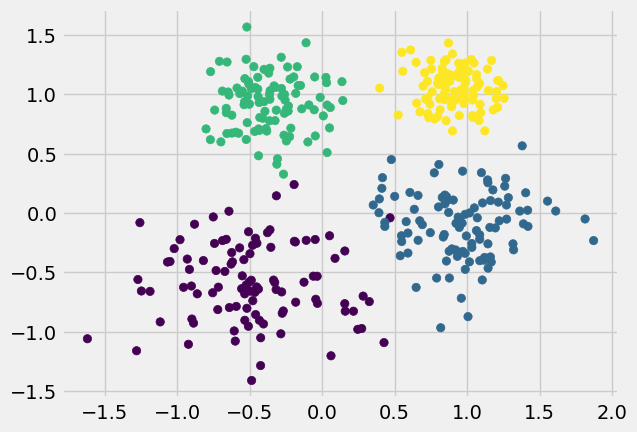

In [6]:
plt.scatter(non_problematic_x[:, 0], non_problematic_x[:, 1], c=non_problematic_y)
plt.show()

In [7]:
k1 = 4
k2 = 3

In [8]:
def plotter(lab1, lab2):
    fig, ax = plt.subplots(1, 2, figsize=(10, 6))
    ax[0].scatter(non_problematic_x[:, 0], non_problematic_x[:, 1], c=lab1)
    ax[1].scatter(problematic_x[:, 0], problematic_x[:, 1], c=lab2)

In [9]:
# Spectral Ensemle
se_1 = SpectralEnsemble(clusters=k1, base_estimator_k=15).fit(non_problematic_x).labels_
se_2 = SpectralEnsemble(clusters=k2, base_estimator_k=15).fit(problematic_x).labels_

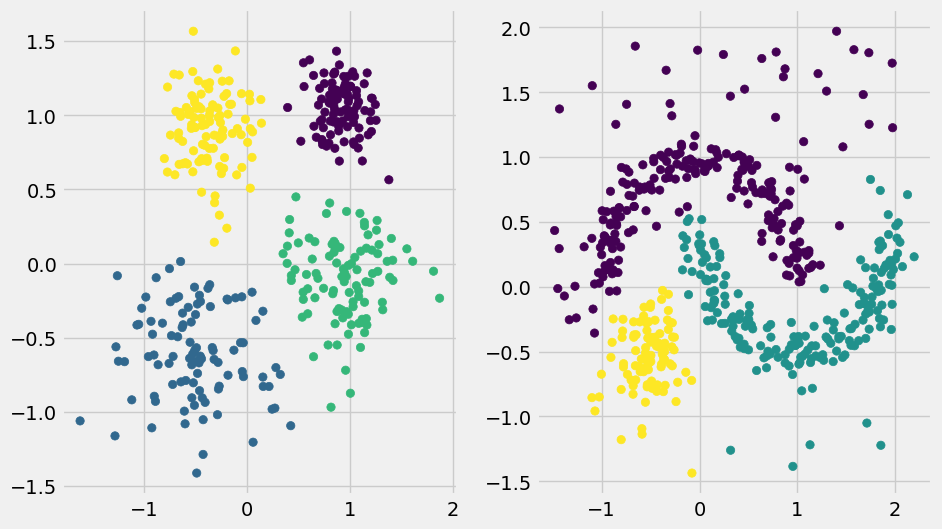

In [10]:
plotter(se_1, se_2)

In [12]:
# KModesEnsemble
np.random.seed(42)
ke_1 = KModesEnsemble(clusters=k1, base_estimator_k=10).fit(non_problematic_x).labels_
ke_2 = KModesEnsemble(clusters=k2, base_estimator_k=5, num_of_partitions=200).fit(problematic_x).labels_

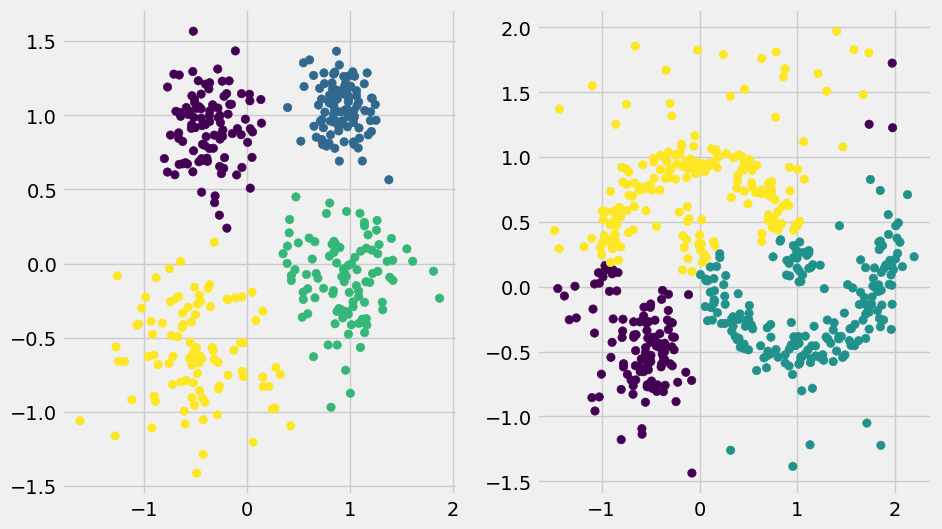

In [14]:
plotter(ke_1, ke_2)

In [72]:
# HierarchyEnsemble
he_1 = HierarchyEnsemble(clusters=k1, base_estimator_k=10).fit(non_problematic_x).labels_
he_2 = HierarchyEnsemble(clusters=k2, base_estimator_k=15).fit(problematic_x).labels_

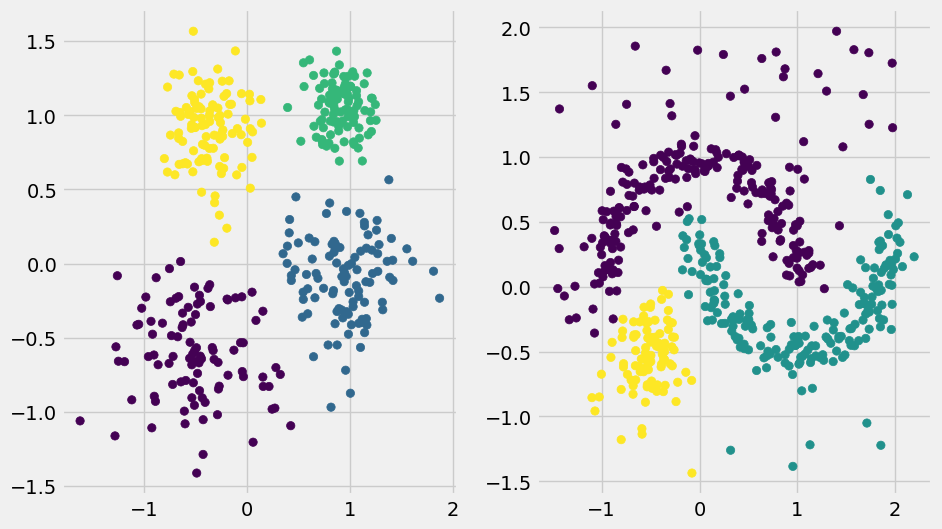

In [73]:
plotter(he_1, he_2)

In [41]:
# BaggedMajority
bm_1 = BaggedMajority(clusters=k1, num_of_partitions=30,
                      params={"n_clusters": k1, "init": "random", "n_init": 1}).fit(non_problematic_x).labels_
bm_2 = BaggedMajority(clusters=k2, num_of_partitions=30,
                      params={"n_clusters": k2, "init": "random", "n_init": 1}).fit(problematic_x).labels_

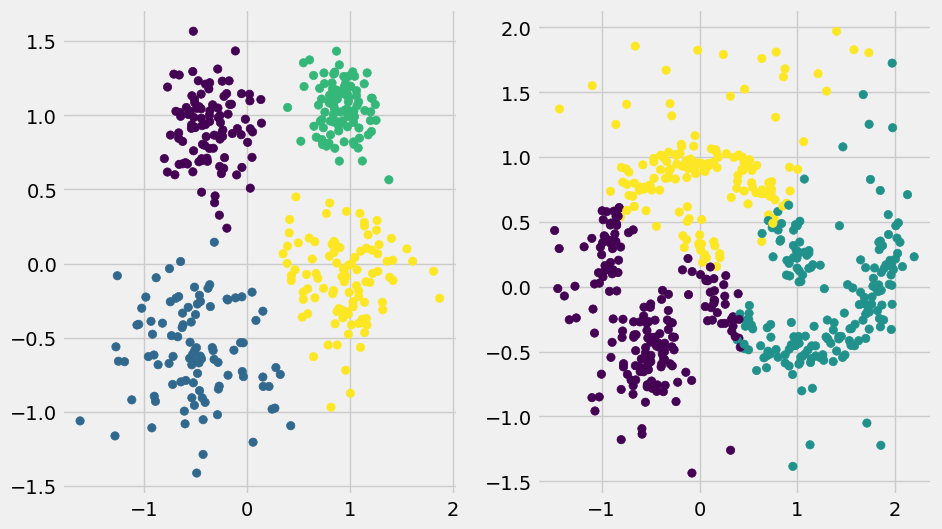

In [42]:
plotter(bm_1, bm_2)

In [18]:
# graph
np.random.seed(20)
ge_1 = GraphConsensus(clusters=k1, base_estimator_k=10, threshold=0.5).fit(non_problematic_x).labels_
ge_2 = GraphConsensus(clusters=k2, base_estimator_k=10, threshold=0.5).fit(problematic_x).labels_

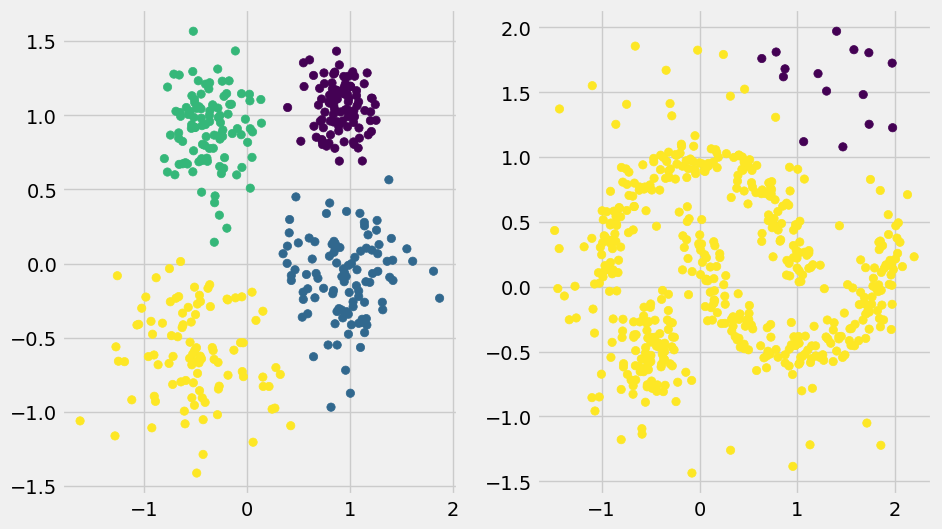

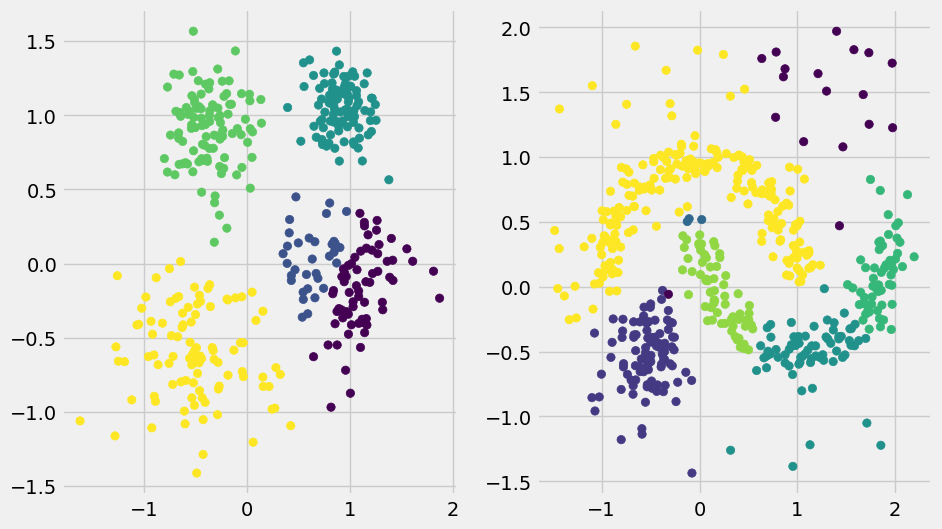

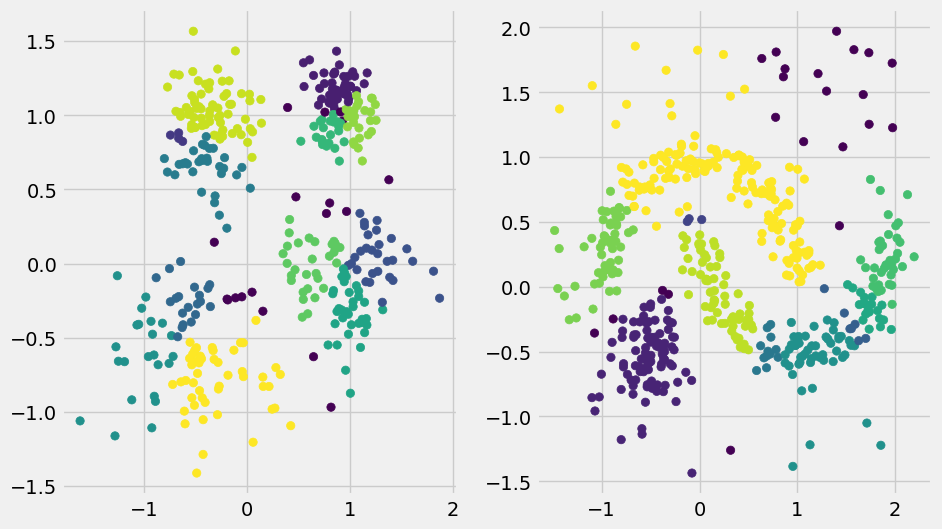

In [21]:
for (index, threshold) in enumerate([0.4, 0.65, 0.8]):
    ge_11 = GraphConsensus(clusters=k1, base_estimator_k=10, threshold=threshold).fit(non_problematic_x).labels_
    ge_12 = GraphConsensus(clusters=k2, base_estimator_k=10, threshold=threshold).fit(problematic_x).labels_
    plotter(ge_11, ge_12)

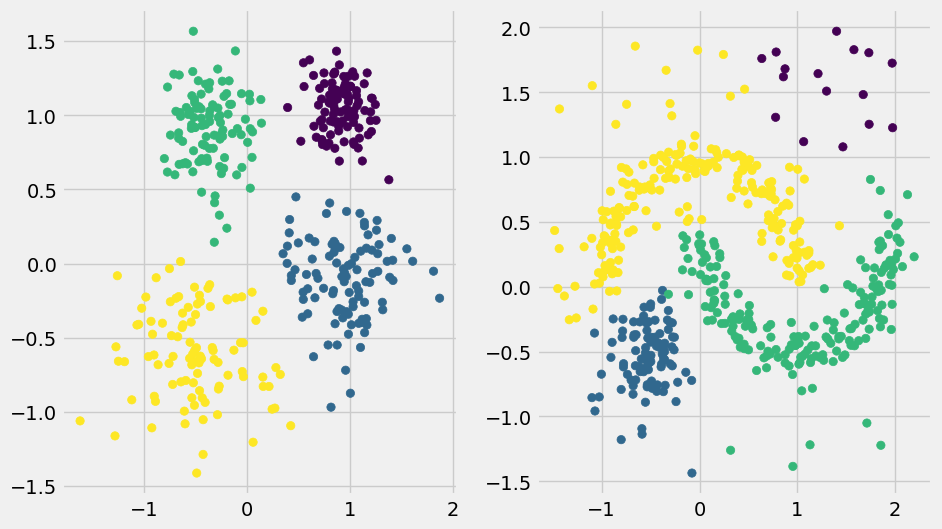

In [127]:
plotter(ge_1, ge_2)

In [185]:
# BaggedEnsemble
be_1 = BaggedEnsemble(clusters=k1, base_centers=15, num_of_partitions=30, linkage="ward").fit(non_problematic_x).labels_
be_2 = BaggedEnsemble(clusters=k2, base_centers=20, num_of_partitions=30, linkage="ward").fit(problematic_x).labels_

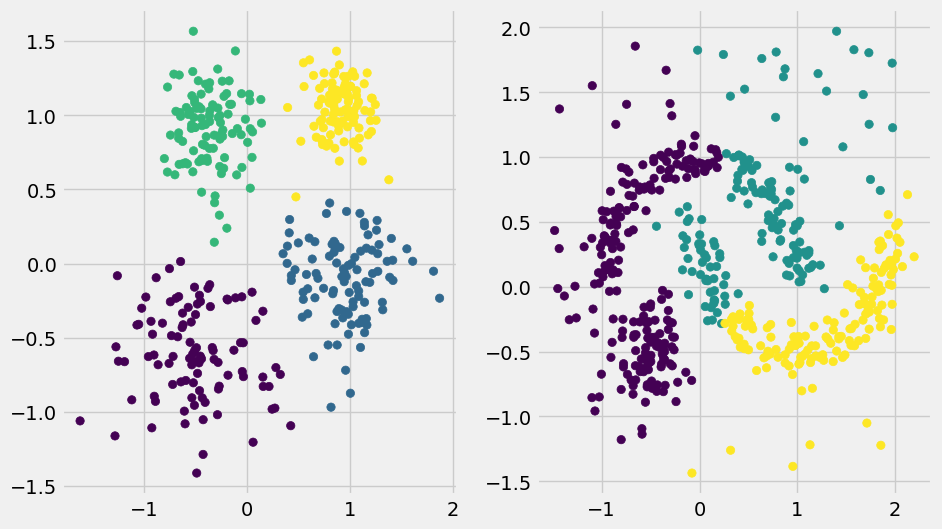

In [186]:
plotter(be_1, be_2)

In [11]:
# CoAssocEnsemble
ca_1 = CoAssocEnsemble(clusters=k1, base_estimator_k=2*k1, threshold=0.6).fit(non_problematic_x).labels_
ca_2 = CoAssocEnsemble(clusters=k2, base_estimator_k=15, threshold=0.6).fit(problematic_x).labels_

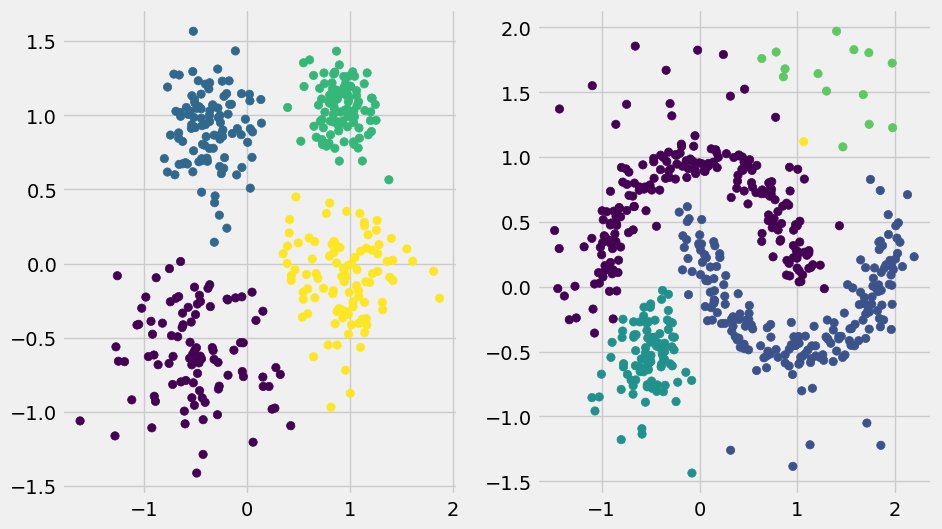

In [12]:
plotter(ca_1, ca_2)

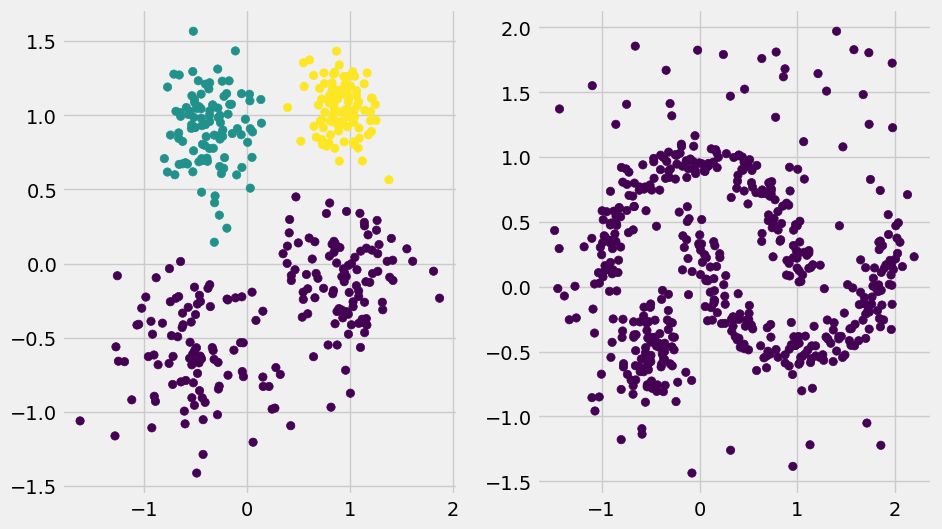

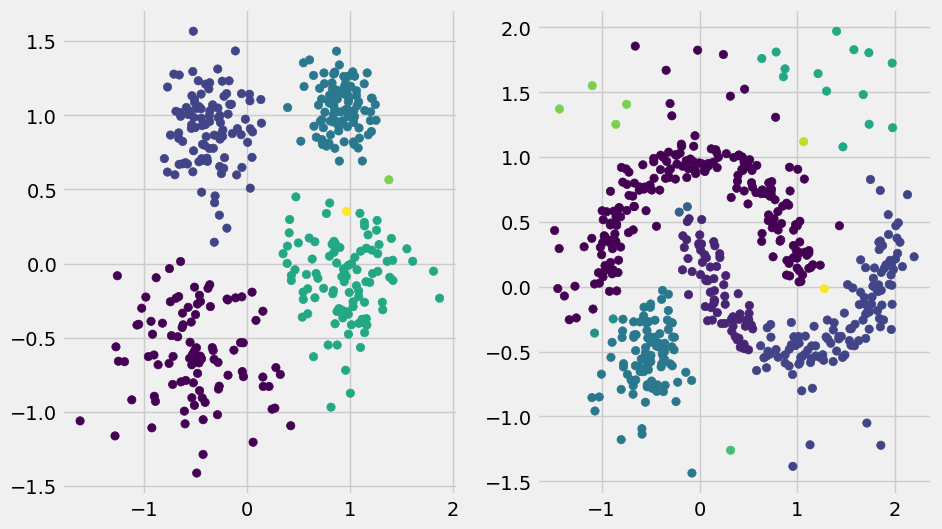

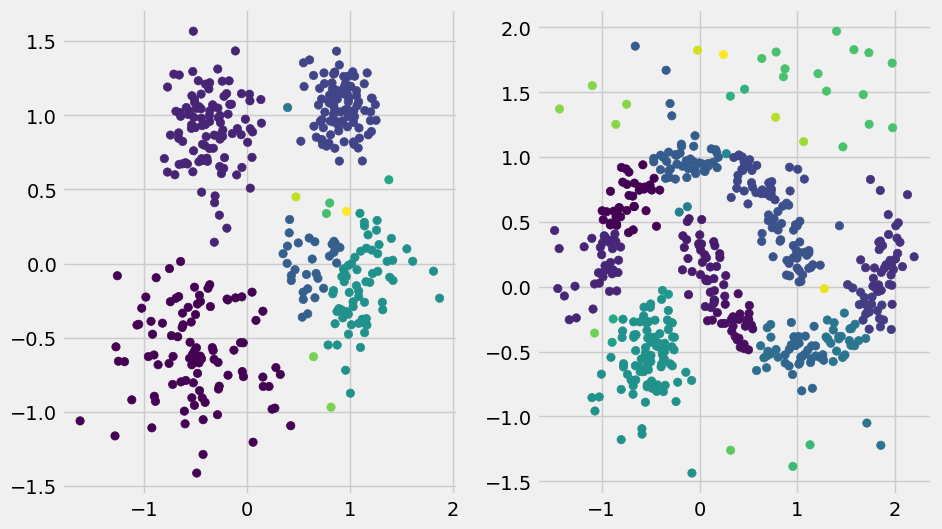

In [25]:
for (index, threshold) in enumerate([0.4, 0.7, 0.8]):
    ca_11 = CoAssocEnsemble(clusters=k1, base_estimator_k=2*k1, threshold=threshold).fit(non_problematic_x).labels_
    ca_12 = CoAssocEnsemble(clusters=k2, base_estimator_k=15, threshold=threshold).fit(problematic_x).labels_
    plotter(ca_11, ca_12)